## Spotify project

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

In [63]:
# Cargar los datos
file_path = './spotify-2023.csv'
spotify_data = pd.read_csv(file_path, encoding='ISO-8859-1')

## Resumen del datafreame

In [64]:
# Configuración para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Función para imprimir el resumen del DataFrame
def print_dataframe_summary(df):
    print("Resumen del DataFrame:")
    print("Dimensiones del conjunto de datos:", spotify_data.shape)
    print("Número de filas:", df.shape[0])
    print("Número de columnas:", df.shape[1])
    print("\nPrimeras 5 filas:\n", df.head())
    print("\nTipos de datos:\n", df.dtypes)
    print("\nEstadísticas descriptivas:\n", df.describe())
    print("\nValores únicos:\n", df.nunique())
    print("\nValores nulos:\n", df.isnull().sum())
    print("Estadísticas descriptivas:")
    print(spotify_data.describe())

# Imprimir resumen del DataFrame
print_dataframe_summary(spotify_data)

Resumen del DataFrame:
Dimensiones del conjunto de datos: (953, 24)
Número de filas: 953
Número de columnas: 24

Primeras 5 filas:
                             track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                 

### ETL limpieza v1

In [61]:
# Limpiamos valores faltantes previamente visualizados
spotify_data = spotify_data.dropna(subset=['key'])
spotify_data = spotify_data.dropna(subset=['in_shazam_charts'])
spotify_data = spotify_data.dropna(subset=['streams'])
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Identificando valores faltantes
print("Valores faltantes por columna:")
print(spotify_data.isnull().sum())

Valores faltantes por columna:
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


## Visualización inicial de datos

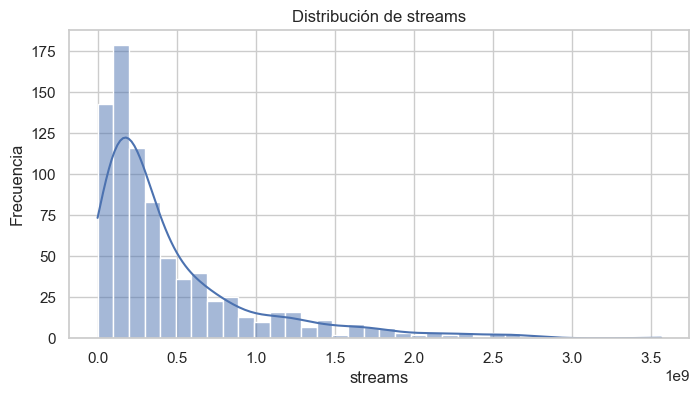

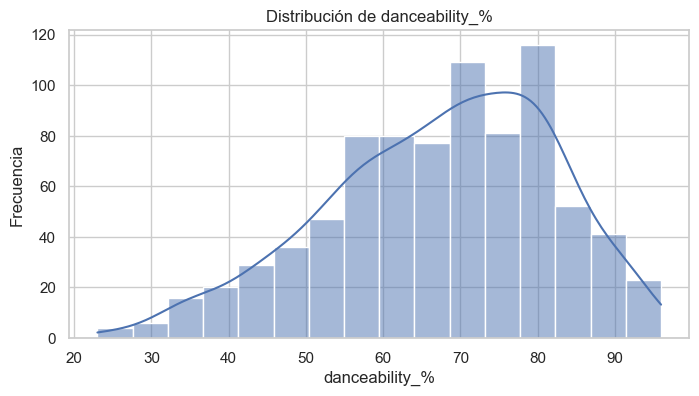

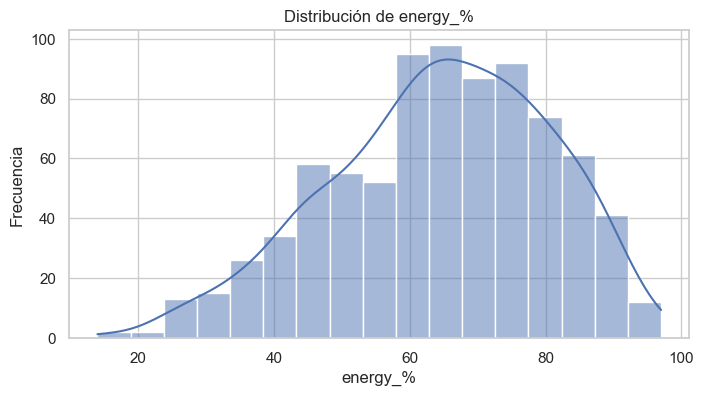

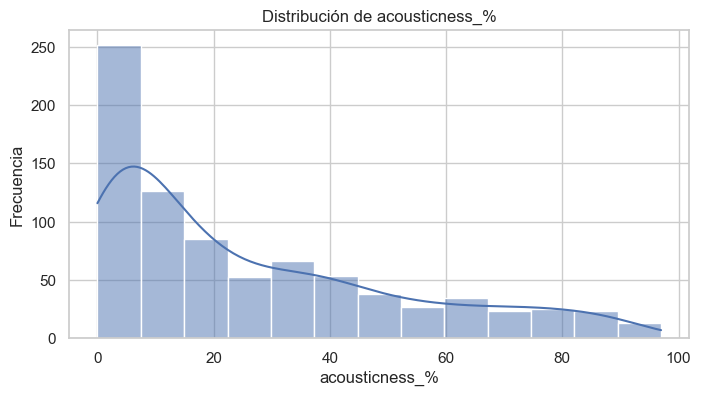

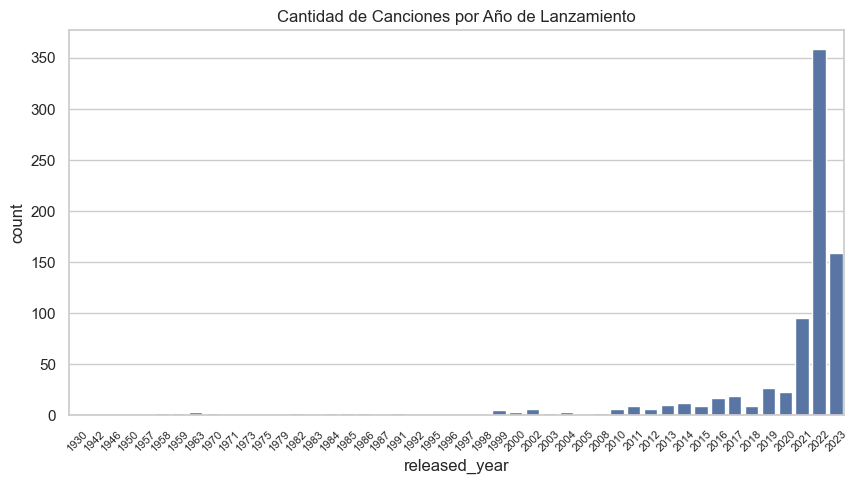

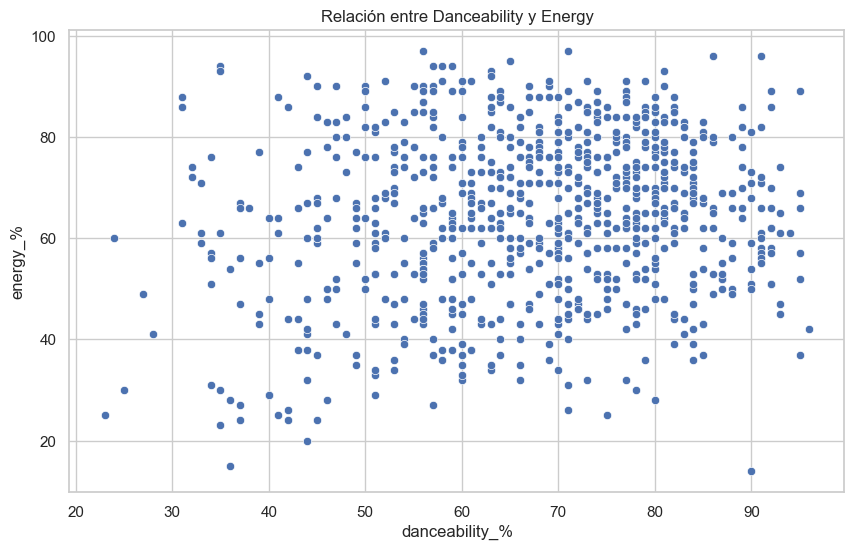

In [46]:
# Función para crear gráficos de distribución
def plot_distribution(df, column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Función para crear gráfico de barras
def plot_bar_chart(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(title)
    plt.xticks(rotation=45, fontsize=8)  # Ajustar el tamaño de la fuente aquí
    plt.xticks(rotation=45)
    plt.show()

# Función para crear gráfico de dispersión
def plot_scatter(df, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Visualización de Distribuciones
columns_for_visualization = ['streams', 'danceability_%', 'energy_%', 'acousticness_%']
for col in columns_for_visualization:
    plot_distribution(spotify_data, col, f'Distribución de {col}')

# Gráfico de barras para 'released_year'
plot_bar_chart(spotify_data, 'released_year', 'Cantidad de Canciones por Año de Lanzamiento')

# Gráfico de dispersión para 'danceability_%' y 'energy_%'
plot_scatter(spotify_data, 'danceability_%', 'energy_%', 'Relación entre Danceability y Energy')

Correlación entre Streams y Presencia la presencia en plataformas:
                     streams  in_spotify_charts  in_apple_charts  \
streams            1.000000           0.214034         0.269137   
in_spotify_charts  0.214034           1.000000         0.556804   
in_apple_charts    0.269137           0.556804         1.000000   
in_deezer_charts   0.184329           0.566161         0.366581   

                   in_deezer_charts  
streams                    0.184329  
in_spotify_charts          0.566161  
in_apple_charts            0.366581  
in_deezer_charts           1.000000  


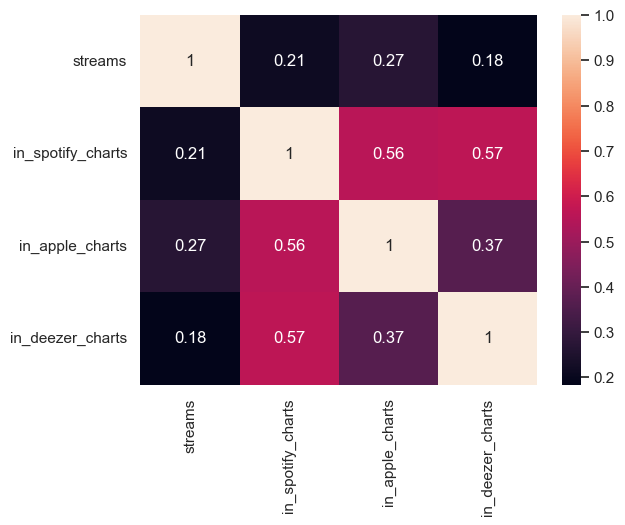

Correlación entre Características Musicales:
                 danceability_%  energy_%  valence_%
danceability_%        1.000000  0.157970   0.389729
energy_%              0.157970  1.000000   0.349736
valence_%             0.389729  0.349736   1.000000


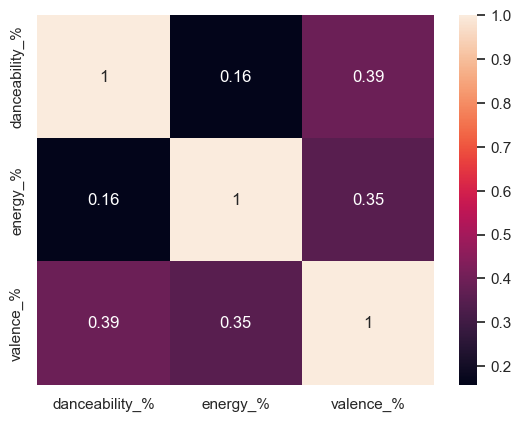

In [45]:
# Calculando la correlación entre 'streams' y la presencia en plataformas musicales
correlation = spotify_data[['streams', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].corr()
print("Correlación entre Streams y Presencia la presencia en plataformas:\n", correlation)

# Visualización de la matriz de correlación
sns.heatmap(correlation, annot=True)
plt.show()

# Análisis de correlación entre danceability, energy y valence
features = ['danceability_%', 'energy_%', 'valence_%']
correlation_matrix = spotify_data[features].corr()
print("Correlación entre Características Musicales:\n", correlation_matrix)

# Visualización de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True)
plt.show()
